# This script contains the following:
## 1. Import libraries and data and drop non-numeric columns
## 2. The elbow technique
## 3. k-means clustering

## 1. Import libraries and data and drop non-numeric columns

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os

import sklearn
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pylab as pl 

In [2]:
# Ensures the graphs you create are displayed

%matplotlib inline

In [3]:
# Define path
path = r'/Users/ianfleming/Desktop/World Happiness Report Analysis'

In [4]:
# Import data
df = pd.read_csv(os.path.join(path,'02 Data','Prepared Data','world_happiness.csv'),index_col=0)

In [5]:
# Check import
df.head()

,country_name,regional_indicator,year,life_ladder,log_gdp_per_capita,social_support,healthy_life_expectancy_at_birth,freedom_to_make_life_choices,generosity,perceptions_of_corruption,positive_affect,negative_affect,confidence_in_national_government,conf_gov_missing,happiness_category
0,Afghanistan,South Asia,2008,3.723590,7.350416,0.450662,50.500000,0.718114,0.167652,0.881686,0.414297,0.258195,0.612072,0,Low
1,Afghanistan,South Asia,2009,4.401778,7.508646,0.552308,50.799999,0.678896,0.190809,0.850035,0.481421,0.237092,0.611545,0,Medium
2,Afghanistan,South Asia,2010,4.758381,7.613900,0.539075,51.099998,0.600127,0.121316,0.706766,0.516907,0.275324,0.299357,0,Medium
3,Afghanistan,South Asia,2011,3.831719,7.581259,0.521104,51.400002,0.495901,0.163571,0.731109,0.479835,0.267175,0.307386,0,Low
4,Afghanistan,South Asia,2012,3.782938,7.660506,0.520637,51.700001,0.530935,0.237588,0.775620,0.613513,0.267919,0.435440,0,Low


In [6]:
df.shape

(2199, 15)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2199 entries, 0 to 2198
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   country_name                       2199 non-null   object 
 1   regional_indicator                 2199 non-null   object 
 2   year                               2199 non-null   int64  
 3   life_ladder                        2199 non-null   float64
 4   log_gdp_per_capita                 2199 non-null   float64
 5   social_support                     2199 non-null   float64
 6   healthy_life_expectancy_at_birth   2199 non-null   float64
 7   freedom_to_make_life_choices       2199 non-null   float64
 8   generosity                         2199 non-null   float64
 9   perceptions_of_corruption          2199 non-null   float64
 10  positive_affect                    2199 non-null   float64
 11  negative_affect                    2199 non-null   float64
 1

In [8]:
# Drop categorical columns
df_numeric = df.drop(columns=['country_name', 'regional_indicator', 'happiness_category', 'year', 'conf_gov_missing'])


In [9]:
# Check remaining columns
df_numeric.head()

,life_ladder,log_gdp_per_capita,social_support,healthy_life_expectancy_at_birth,freedom_to_make_life_choices,generosity,perceptions_of_corruption,positive_affect,negative_affect,confidence_in_national_government
0,3.723590,7.350416,0.450662,50.500000,0.718114,0.167652,0.881686,0.414297,0.258195,0.612072
1,4.401778,7.508646,0.552308,50.799999,0.678896,0.190809,0.850035,0.481421,0.237092,0.611545
2,4.758381,7.613900,0.539075,51.099998,0.600127,0.121316,0.706766,0.516907,0.275324,0.299357
3,3.831719,7.581259,0.521104,51.400002,0.495901,0.163571,0.731109,0.479835,0.267175,0.307386
4,3.782938,7.660506,0.520637,51.700001,0.530935,0.237588,0.775620,0.613513,0.267919,0.435440


In [10]:
df_numeric.shape

(2199, 10)

In [11]:
# I know I have missing values in this column and k-means cannot handle missing data. To check how much missing
df['confidence_in_national_government'].isnull().sum()


361

I have 361 missing values. In the main df I have created a flag column, in case I need this data at a later stage. The missing values account for 16% of the data so it is a large proportion. For the purpose of the k-means, I will impute the mean as it is the cleanest.

In [12]:
# Impute missing values with the mean
df_numeric['confidence_in_national_government'] = df_numeric['confidence_in_national_government'].fillna(
    df_numeric['confidence_in_national_government'].mean()
)


In [13]:
# Call StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_numeric)

## 2. The Elbow Technique

In [14]:
# Elbow Method to find optimal number of clusters
num_cl = range(1, 10)
kmeans = [KMeans(n_clusters=i, random_state=42) for i in num_cl]


In [15]:
scores = [kmeans[i].fit(X_scaled).inertia_ for i in range(len(kmeans))]

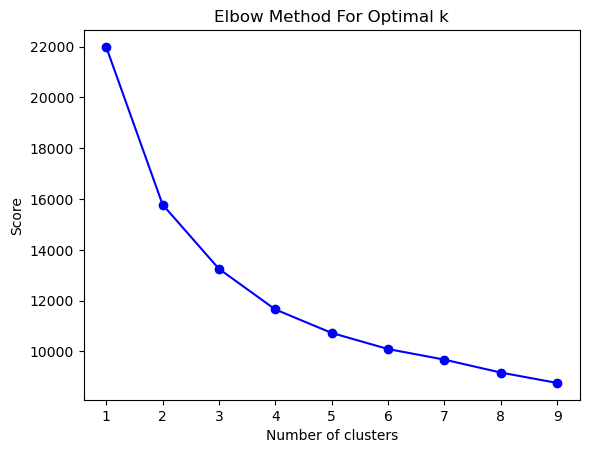

In [16]:
plt.plot(num_cl, scores, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Score')
plt.title('Elbow Method For Optimal k')
plt.show()

### Elbow Method Interpretation

The elbow method was applied to determine the optimal number of clusters for the dataset.  
The score decreased sharply when moving from 1 to 2 to 3 clusters, showing that additional clusters were capturing much more of the data’s variance.  

From 3 to 4 clusters, the drop was still noticeable but less steep. After 4 clusters, the curve began to flatten out, meaning that adding more clusters only marginally improved the model.  

Based on this, the "elbow" appears at 3 clusters, since that is where the curve bends most clearly before flattening.  
Therefore, I will proceed with k = 3 as the optimal number of clusters for the k-means algorithm.  

Note: I think choosing 4 clusters could also be justified


## 3. k-means clustering

In [17]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3)

In [18]:
# Fit the model to my standardised numeric data
kmeans.fit(X_scaled)

KMeans(n_clusters=3)

In [19]:
# Assign clusters back to the full dataframe
df['cluster'] = kmeans.labels_

In [20]:
# Check for columns
df[['country_name', 'year', 'cluster']].head()

,country_name,year,cluster
0,Afghanistan,2008,1
1,Afghanistan,2009,1
2,Afghanistan,2010,1
3,Afghanistan,2011,1
4,Afghanistan,2012,1


In [21]:
df.head()

,country_name,regional_indicator,year,life_ladder,log_gdp_per_capita,social_support,healthy_life_expectancy_at_birth,freedom_to_make_life_choices,generosity,perceptions_of_corruption,positive_affect,negative_affect,confidence_in_national_government,conf_gov_missing,happiness_category,cluster
0,Afghanistan,South Asia,2008,3.723590,7.350416,0.450662,50.500000,0.718114,0.167652,0.881686,0.414297,0.258195,0.612072,0,Low,1
1,Afghanistan,South Asia,2009,4.401778,7.508646,0.552308,50.799999,0.678896,0.190809,0.850035,0.481421,0.237092,0.611545,0,Medium,1
2,Afghanistan,South Asia,2010,4.758381,7.613900,0.539075,51.099998,0.600127,0.121316,0.706766,0.516907,0.275324,0.299357,0,Medium,1
3,Afghanistan,South Asia,2011,3.831719,7.581259,0.521104,51.400002,0.495901,0.163571,0.731109,0.479835,0.267175,0.307386,0,Low,1
4,Afghanistan,South Asia,2012,3.782938,7.660506,0.520637,51.700001,0.530935,0.237588,0.775620,0.613513,0.267919,0.435440,0,Low,1


In [22]:
df.shape

(2199, 16)

In [23]:
# Check values
df['cluster'].value_counts()

cluster
0    976
1    762
2    461
Name: count, dtype: int64

### Create Visuals

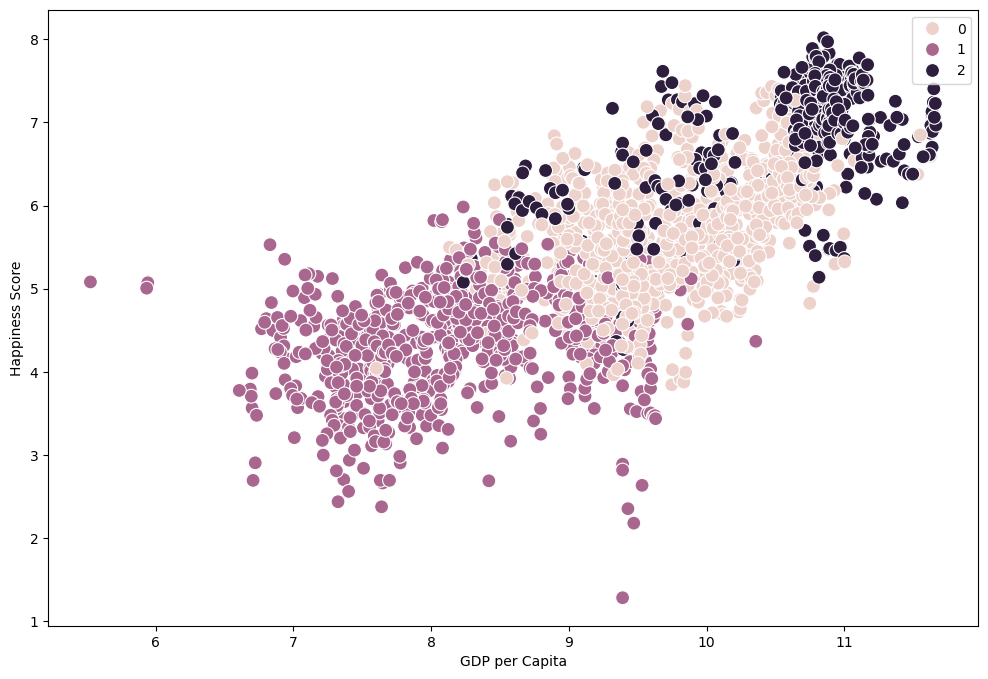

In [24]:
# Plot the clusters for GDP vs Life ladder

clus_gdp_1 = plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['log_gdp_per_capita'], y=df['life_ladder'], hue=kmeans.labels_, s=100) 


ax.grid(False) # This removes the grid from the background.
plt.xlabel('GDP per Capita') # Label x-axis.
plt.ylabel('Happiness Score') # Label y-axis.
plt.show()

In [25]:
# Export visual
clus_gdp_1.figure.savefig(os.path.join(path,'04 Analysis', 'Visualisations', 'cluster_scatterplot_gdp_1_happiness.png'))

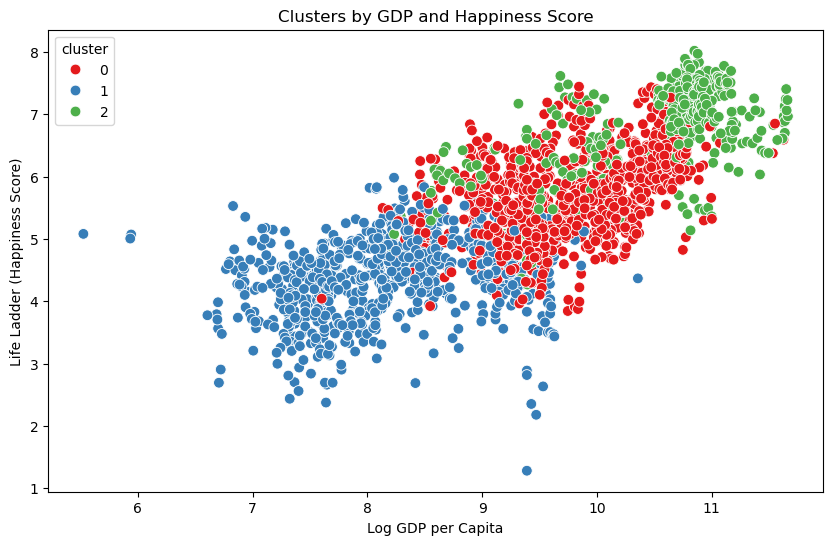

In [26]:
clus_gdp_2 = plt.figure(figsize=(10,6))
sns.scatterplot(
    x=df['log_gdp_per_capita'], 
    y=df['life_ladder'], 
    hue=df['cluster'], 
    palette='Set1', 
    s=60
)
plt.title('Clusters by GDP and Happiness Score')
plt.xlabel('Log GDP per Capita')
plt.ylabel('Life Ladder (Happiness Score)')
plt.show()


In [27]:
# Export visual
clus_gdp_2.figure.savefig(os.path.join(path,'04 Analysis', 'Visualisations', 'cluster_scatterplot_gdp_2_happiness.png'))

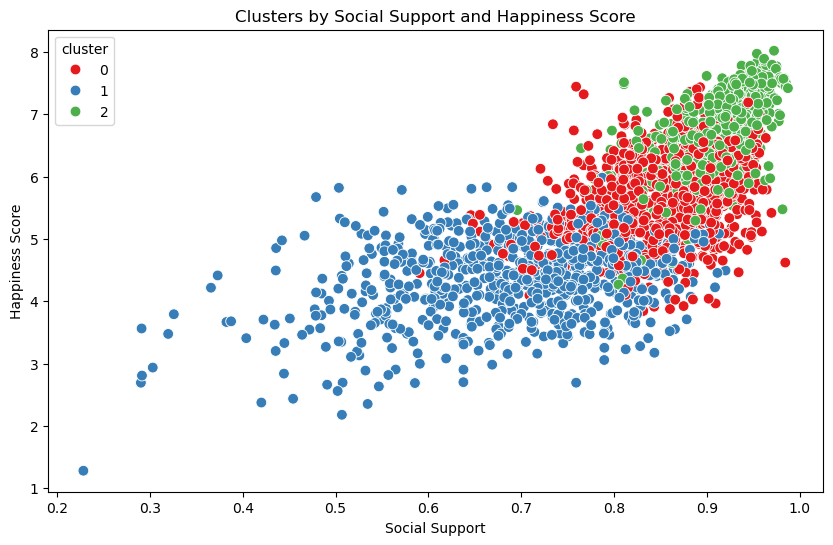

In [28]:
# Create scatterplot with clusters of Social Support and Happiness score (life_ladder)
clus_soc = plt.figure(figsize=(10,6))
sns.scatterplot(
    x=df['social_support'], 
    y=df['life_ladder'], 
    hue=df['cluster'], 
    palette='Set1', s=60
)

plt.title('Clusters by Social Support and Happiness Score')
plt.xlabel('Social Support')
plt.ylabel('Happiness Score')
plt.show()


In [29]:
# Export visual
clus_soc.figure.savefig(os.path.join(path,'04 Analysis', 'Visualisations', 'cluster_scatter_social_support_happiness.png'))

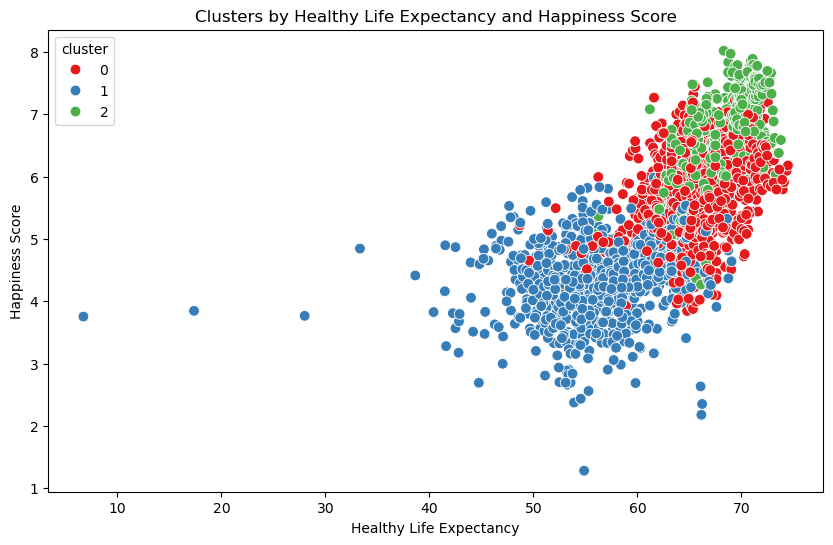

In [30]:
# Create scatterplot with clusters of Healthy Life Expentancy and Happiness score (life_ladder)
clus_life_exp = plt.figure(figsize=(10,6))
sns.scatterplot(
    x=df['healthy_life_expectancy_at_birth'], 
    y=df['life_ladder'], 
    hue=df['cluster'], 
    palette='Set1', s=60
)

plt.title('Clusters by Healthy Life Expectancy and Happiness Score')
plt.xlabel('Healthy Life Expectancy')
plt.ylabel('Happiness Score')
plt.show()


In [31]:
# Export visual
clus_life_exp.figure.savefig(os.path.join(path,'04 Analysis', 'Visualisations', 'cluster_life_expectancy_happiness.png'))

### Visualising Clusters

To interpret the clustering results, I plotted the clusters against several key variables related to happiness:

- GDP per Capita vs Happiness Score: Clear separation between low-GDP/low-happiness countries and high-GDP/high-happiness countries, with a middle group in between. An interesting observation is that in the blue cluster (generally representing countries with lower GDP and lower happiness), there are a few points where countries show relatively low GDP but much higher happiness scores.This suggests that economic wealth is not the only driver of happiness. These outliers could represent countries where social support, cultural values, or governance have a strong positive effect on happiness, even if GDP is modest. It also highlights the subjective nature of happiness reporting.

  
- Social Support vs Happiness Score: A strong relationship is visible; higher social support is generally associated with higher happiness. The clusters reflect low, medium, and high levels of both.
  
- Healthy Life Expectancy vs Happiness Score: Similar trend to the above, with higher life expectancy associated with higher happiness. Clusters again align with low, medium, and high groups.

Overall, the visualisations confirm that the k-means algorithm has grouped the data in a way that makes intuitive sense: countries with stronger economies, social support, and life expectancy tend to cluster together and score higher in happiness.


#### Further investigation because the visuals got me thinking

In [32]:
df[df['cluster'] == 1] \
  .sort_values('life_ladder', ascending=False) \
  .head(10)[['country_name','year','log_gdp_per_capita','life_ladder']]


,country_name,year,log_gdp_per_capita,life_ladder
1377,Nepal,2020,8.232654,5.982410
1497,Pakistan,2017,8.495299,5.830871
1911,Tajikistan,2017,8.082229,5.829234
190,Benin,2018,8.019668,5.819827
433,Republic of the Congo,2022,8.077151,5.804919
1490,Pakistan,2010,8.308448,5.786133
1487,Pakistan,2007,8.314321,5.671461
710,Ghana,2011,8.325684,5.608200
39,Angola,2011,8.944346,5.589001
1496,Pakistan,2016,8.465209,5.548508


I was trying to investigate the outliers in GDP and Happiness Score but was not able to figure it out.....yet

In [33]:
# Group by cluster and calculate descriptive stats
df.groupby('cluster').agg({
    'log_gdp_per_capita': ['mean','median'],
    'life_ladder': ['mean','median']
    'social_support': ['mean','median'],
    'healthy_life_expectancy_at_birth': ['mean','median'],
    'freedom_to_make_life_choices': ['mean','median'],
    'generosity': ['mean','median'],
    'perceptions_of_corruption': ['mean','median'],
    'confidence_in_national_government': ['mean','median']
})


log_gdp_per_capita            life_ladder           social_support  \
                      mean     median        mean    median           mean   
cluster                                                                      
0                 9.778274   9.800451    5.717325  5.753574       0.854866   
1                 8.193125   8.137963    4.365731  4.424435       0.692031   
2                10.545201  10.774600    6.815665  6.983557       0.913249   

                  healthy_life_expectancy_at_birth             \
           median                             mean     median   
cluster                                                         
0        0.866004                        66.048401  66.110001   
1        0.708364                        56.395230  56.437500   
2        0.926319                        68.868509  70.000000   

        freedom_to_make_life_choices           generosity            \
                                mean    median       mean    median   
cluster                                                               
0                           0.730618  0.747858  -0.072755 -0.082314   
1                           0.684766  0.706386   0.011866 -0.006552   
2                           0.888644  0.902075   0.134878  0.128131   

        perceptions_of_corruption           confidence_in_national_government  \
                             mean    median                              mean   
cluster                                                                         
0                        0.821011  0.836046                          0.358825   
1                        0.784031  0.806310                          0.571841   
2                        0.520489  0.511197                          0.589580   

                   
           median  
cluster            
0        0.340113  
1        0.576387  
2        0.584562

### Interpreting Descriptive Statistics by cluster

- Cluster 0 - Red  
  - Average GDP per capita: 9.8  
  - Average Happiness (Life Ladder): 5.8  
  - Social support is relatively strong at 0.85  
  - Life expectancy is moderate 66 years  
  - Interpretation: This cluster represents countries with medium GDP, medium happiness countries, supported by decent social systems and average life expectancy.

- Cluster 1 - Blue 
  - Average GDP per capita: 8.2  
  - Average Happiness: 4.4  
  - Social support and freedom scores are the lowest  
  - Life expectancy is the lowest 56 years  
  - Interpretation: This cluster represents lower GDP, lower happiness countries, often with weaker institutions, shorter life expectancy, and less social support.

- Cluster 3 - Green 
  - Average GDP per capita: 10.5  
  - Average Happiness: 7.0  
  - Social support is the strongest 0.91  
  - Life expectancy is the highest 70 years  
  - Interpretation: This cluster represents high GDP, high happiness countries, with strong social networks, long life expectancy, and high freedom scores.

Conclusion: The clusters make sense and align with expectations: countries with higher GDP tend to have higher happiness and stronger health and social indicators, while countries with lower GDP show the opposite pattern.


### How this could be useful in further steps in an analytical pipeline


Given these results, the next step in an analytical pipeline would be to run further analyses on each cluster to explore how different factors influence happiness within each group.

- Cluster 0 Red (Medium GDP & Happiness):** Further analysis could investigate how variations in social support and life expectancy explain differences in happiness across medium-GDP countries.
   
- Cluster 1 Blue (Low GDP & Happiness):** Future work could focus on structural challenges, such as health and governance, to understand why these countries struggle with both economic and well-being outcomes.

  
- Cluster 2 Green (High GDP & Happiness):** Deeper analysis might look at the role of freedom, corruption, and generosity, to understand why happiness remains higher in this group despite some variations in GDP.

Conclusion: By segmenting countries into clusters, we create a foundation for targeted regression or predictive modeling, where the drivers of happiness can be analysed separately for different economic and social contexts.



In [34]:
# Check dataframe before export
df.head()

,country_name,regional_indicator,year,life_ladder,log_gdp_per_capita,social_support,healthy_life_expectancy_at_birth,freedom_to_make_life_choices,generosity,perceptions_of_corruption,positive_affect,negative_affect,confidence_in_national_government,conf_gov_missing,happiness_category,cluster
0,Afghanistan,South Asia,2008,3.723590,7.350416,0.450662,50.500000,0.718114,0.167652,0.881686,0.414297,0.258195,0.612072,0,Low,1
1,Afghanistan,South Asia,2009,4.401778,7.508646,0.552308,50.799999,0.678896,0.190809,0.850035,0.481421,0.237092,0.611545,0,Medium,1
2,Afghanistan,South Asia,2010,4.758381,7.613900,0.539075,51.099998,0.600127,0.121316,0.706766,0.516907,0.275324,0.299357,0,Medium,1
3,Afghanistan,South Asia,2011,3.831719,7.581259,0.521104,51.400002,0.495901,0.163571,0.731109,0.479835,0.267175,0.307386,0,Low,1
4,Afghanistan,South Asia,2012,3.782938,7.660506,0.520637,51.700001,0.530935,0.237588,0.775620,0.613513,0.267919,0.435440,0,Low,1


In [35]:
df.shape


(2199, 16)

Export updated dataframe with new cluster column

In [36]:
# Export data
df.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'world_happiness.csv'))